In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
# splitting data as data and target

X = mnist["data"]
y = mnist["target"]
X = X/255 # normalization of data

# for hot encoding the labels

number_of_digits = 10
number_of_examples = y.shape[0]

y = y.reshape(1, number_of_examples)
y_new = np.eye(number_of_digits)[y.astype('int32')]
Y_new = y_new.T.reshape(number_of_digits, number_of_examples)

# preparing train and test data
number_train_samples = 60000
number_test_samples = X.shape[0] - number_train_samples

X_train, Y_train = X[:number_train_samples].T, Y_new[:,:number_train_samples]
X_test, Y_test = X[number_train_samples:].T, Y_new[:,number_train_samples:]

np.random.seed(138)
shuffle_index = np.random.permutation(number_train_samples)
X_train, Y_train = X_train[:,shuffle_index], Y_train[:,shuffle_index]

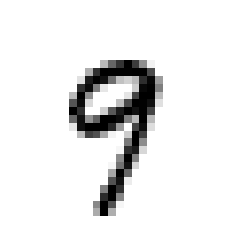

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [4]:
i = 8
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def prime_sigmoid(z):
    return (sigmoid(z)*(1-sigmoid(z)))

def softmax(z):
    return ((np.exp(z)/np.sum(np.exp(z), axis=0)))

def cross_entropy_multi_class(y, y_hat):
    
    m = y.shape[1]
    loss = (-1/m)*(np.sum(np.multiply(y, np.log(y_hat))))
    return loss

def Feedforward(X, params):
    
    forward_prop = {}
    forward_prop["Z1"] = np.matmul(params["W1"], X) + params["b1"]
    forward_prop["A1"] = sigmoid(forward_prop["Z1"])
    forward_prop["Z2"] = np.matmul(params["W2"], forward_prop["A1"]) + params["b2"]
    forward_prop["A2"] = softmax(forward_prop["Z2"])
    
    return forward_prop

def Backpropagate(X, Y, params, forward_prop):
    
    m = X.shape[0]
    
    dZ2 = forward_prop["A2"] - Y
    dW2 = (1/m)*(np.matmul(dZ2, forward_prop["A1"].T))
    db2 = (1/m)*(np.sum(dZ2))
    
    dA1 = np.matmul(params["W2"].T, dZ2)
    dZ1 = dA1 * prime_sigmoid(forward_prop["Z1"])
    dW1 = (1/m)*(np.matmul(dZ1, X.T))
    db1 = (1/m)*(np.sum(dZ1))
    
    gradients = {"dW1": dW1,
                 "db1": db1,
                 "dW2": dW2,
                 "db2": db2}
    
    return gradients

epoch: 0 training loss: 12.477405670944197
epoch: 1000 training loss: 0.3173412506158842


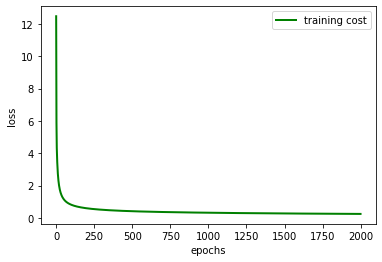

final loss: 0.2442163895533677


In [6]:
number_inputlayer = X_train.shape[0]
number_hiddenlayer = 100
learning_rate = 0.01
ilist = []
trl = []
tel = []

#parameters initialization
parameters = {"W1": np.random.randn(number_hiddenlayer,number_inputlayer),
              "b1": np.zeros((number_hiddenlayer, 1)),
              "W2": np.random.randn(number_of_digits, number_hiddenlayer),
              "b2": np.zeros((number_of_digits, 1))}

for i in range(2000):
    
    forward_prop = Feedforward(X_train, parameters)
    cost = cross_entropy_multi_class(Y_train, forward_prop["A2"])
    backword_prop = Backpropagate(X_train, Y_train, parameters, forward_prop)
    
    parameters["W2"] = parameters["W2"] - learning_rate * backword_prop["dW2"]
    parameters["b2"] = parameters["b2"] - learning_rate * backword_prop["db2"]
    parameters["W1"] = parameters["W1"] - learning_rate * backword_prop["dW1"]
    parameters["b1"] = parameters["b1"] - learning_rate * backword_prop["db1"]
    ilist.append(i)
    trl.append(cost)
#     tel.append(testing_loss)
#     plt.plot(range(i,i+1), cost,color='green',linewidth=2, markersize=12)
    if (i % 1000 ==0):
        print("epoch:",i,"training loss:",cost)

plt.plot(ilist, trl,color='green',linewidth=2, markersize=12,label='training cost')
# plt.plot(ilist, tel,color='red',linewidth=2, markersize=12)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
print("final loss:",cost)

In [8]:
Z1 = np.matmul(parameters["W1"], X_test) + parameters["b1"]
A1 = sigmoid(Z1)
Z2 = np.matmul(parameters["W2"], A1) + parameters["b2"]
A2 = softmax(Z2)

predicted = np.argmax(A2, axis=0)
desired = np.argmax(Y_test, axis=0)

print(confusion_matrix(predicted, desired))
print(classification_report(predicted, desired))

[[ 944    0    9    1    2    9   14    2   12    7]
 [   0 1108    7    0    2    4    3   10    2    6]
 [   4    6  929   16    8    6    8   22    7    4]
 [   4    3   14  913    3   36    1    7   30   11]
 [   0    1   10    3  896    4   16   10    5   37]
 [  11    1    3   35    2  783   15    1   22    5]
 [   6    3   14    1   12   10  893    0   15    1]
 [   2    1   19   14    4    6    2  934    7   32]
 [   7   12   21   20    9   25    6    6  863   15]
 [   2    0    6    7   44    9    0   36   11  891]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1000
           1       0.98      0.97      0.97      1142
           2       0.90      0.92      0.91      1010
           3       0.90      0.89      0.90      1022
           4       0.91      0.91      0.91       982
           5       0.88      0.89      0.88       878
           6       0.93      0.94      0.93       955
           7       0.91      0.91   